In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [5]:
warnings.simplefilter('ignore')

# open the file

In [6]:
data = pd.read_csv('sales_data_sample.csv', encoding='latin1')
pd.options.display.max_rows=1000
pd.options.display.max_columns=30
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


#  Details about Data

In [7]:
data.shape

(2823, 25)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [9]:
data.isna().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [10]:
round(data[['PRICEEACH','SALES','QUANTITYORDERED']].describe().loc[['mean','min','max']],2)

,PRICEEACH,SALES,QUANTITYORDERED
mean,83.66,3553.89,35.09
min,26.88,482.13,6.00
max,100.00,14082.80,97.00


In [11]:
data.isna().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

#  Fill the empty Data with Unknown and Not Assigned

In [12]:
data['STATE']=data['STATE'].fillna('Unknown')
data['TERRITORY']=data['TERRITORY'].fillna('Not Assigned')

In [13]:
data.isna().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE                  0
POSTALCODE            76
COUNTRY                0
TERRITORY              0
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [14]:
data


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,Not Assigned,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,Unknown,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,Unknown,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,Not Assigned,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,Not Assigned,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",NaN,Madrid,Unknown,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,Ships,54,S72_3212,"Oulu Toy Supplies, Inc.",981-443655,Torikatu 38,NaN,Oulu,Unknown,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",NaN,Madrid,Unknown,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,Ships,54,S72_3212,Alpha Cognac,61.77.6555,1 rue Alsace-Lorraine,NaN,Toulouse,Unknown,31000,France,EMEA,Roulet,Annette,Small


In [15]:
data['ORDERDATE'] = pd.to_datetime(data['ORDERDATE']) 


# Function to show detail over any Visualization

In [16]:
def bars(ax):
    for bars in ax.containers:
        ax.bar_label(bars,fmt="%.1f",fontweight='bold')

# Visualization

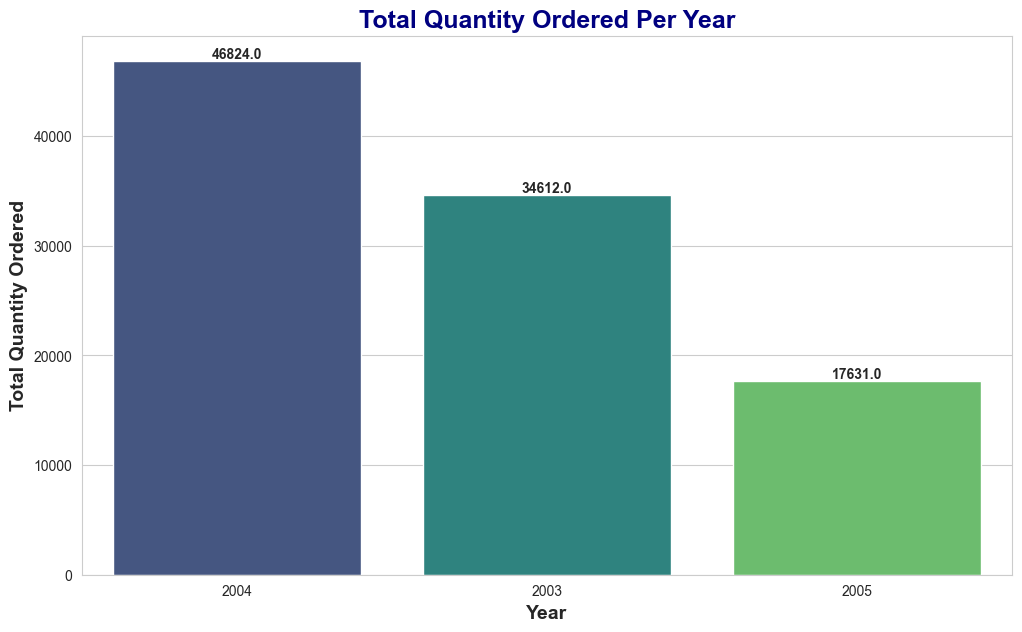

In [17]:
total_per_year = data.groupby('YEAR_ID')['QUANTITYORDERED'].sum().sort_values(ascending=False)
plt.figure(figsize=(12,7))
sns.set_style('whitegrid')
ax = sns.barplot(x=total_per_year.index,y=total_per_year.values,order= total_per_year.index,palette='viridis')

bars(ax)
plt.title("Total Quantity Ordered Per Year", fontsize=18, fontweight='bold', color='navy')
plt.xlabel("Year", fontsize=14, fontweight='bold')
plt.ylabel("Total Quantity Ordered", fontsize=14, fontweight='bold')
plt.show()


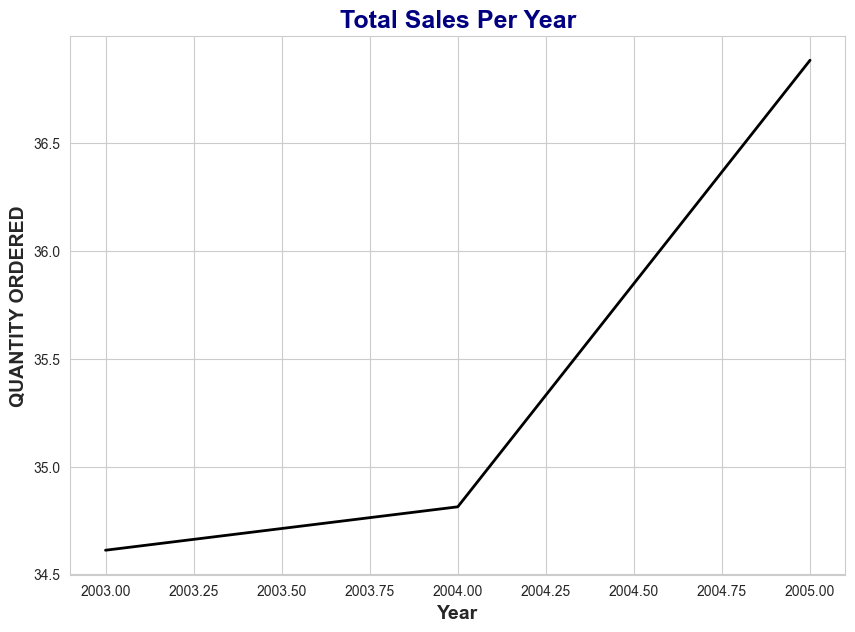

In [18]:
plt.figure(figsize=(10,7))

sns.lineplot(data=data,x='YEAR_ID',y='QUANTITYORDERED',ci=None,color='black',linewidth=2)
plt.title("Total Sales Per Year", fontsize=18, fontweight='bold', color='navy')
plt.xlabel("Year", fontsize=14, fontweight='bold')
plt.ylabel("QUANTITY ORDERED", fontsize=14, fontweight='bold')

plt.show()

In [19]:
sales_per_year=round(data.groupby('YEAR_ID')['SALES'].sum(),1).sort_values(ascending=False)

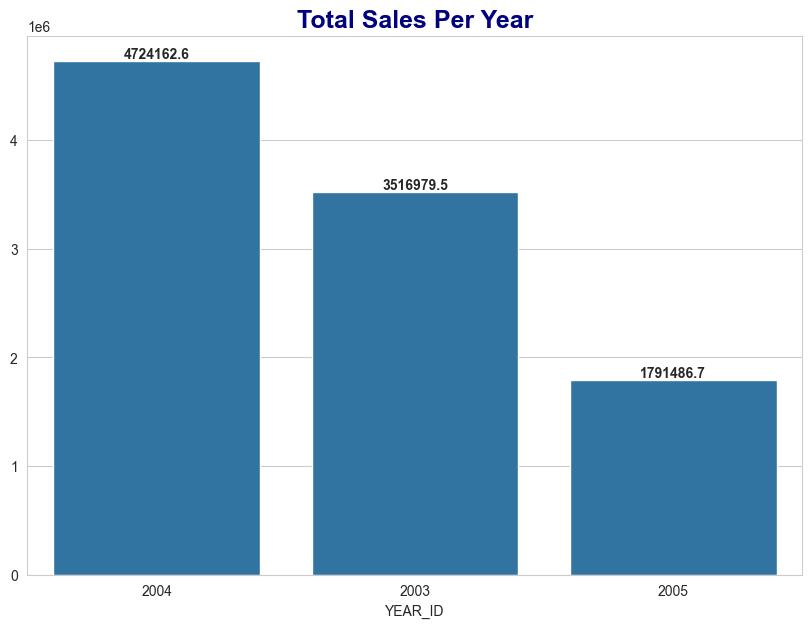

In [37]:
plt.figure(figsize=(10,7))
sns.set_style('whitegrid')
plt.title("Total Sales Per Year", fontsize=18, fontweight='bold', color='navy')
    
ax=sns.barplot(x=sales_per_year.index,y=sales_per_year.values,order=sales_per_year.index)
bars(ax)
plt.show()

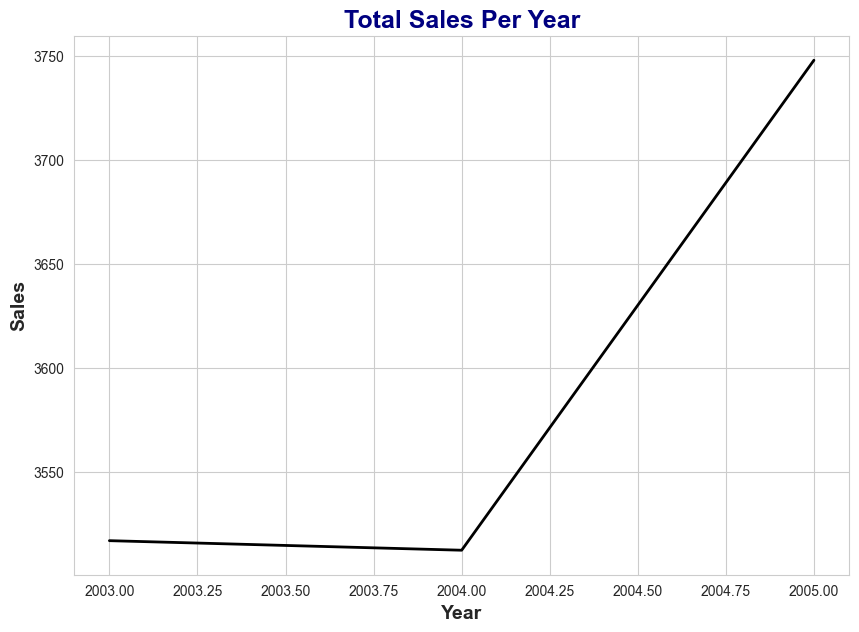

In [21]:
plt.figure(figsize=(10,7))

sns.lineplot(data=data,x='YEAR_ID',y='SALES',ci=None,color='black',linewidth=2)
plt.title("Total Sales Per Year", fontsize=18, fontweight='bold', color='navy')
plt.xlabel("Year", fontsize=14, fontweight='bold')
plt.ylabel("Sales", fontsize=14, fontweight='bold')

plt.show()

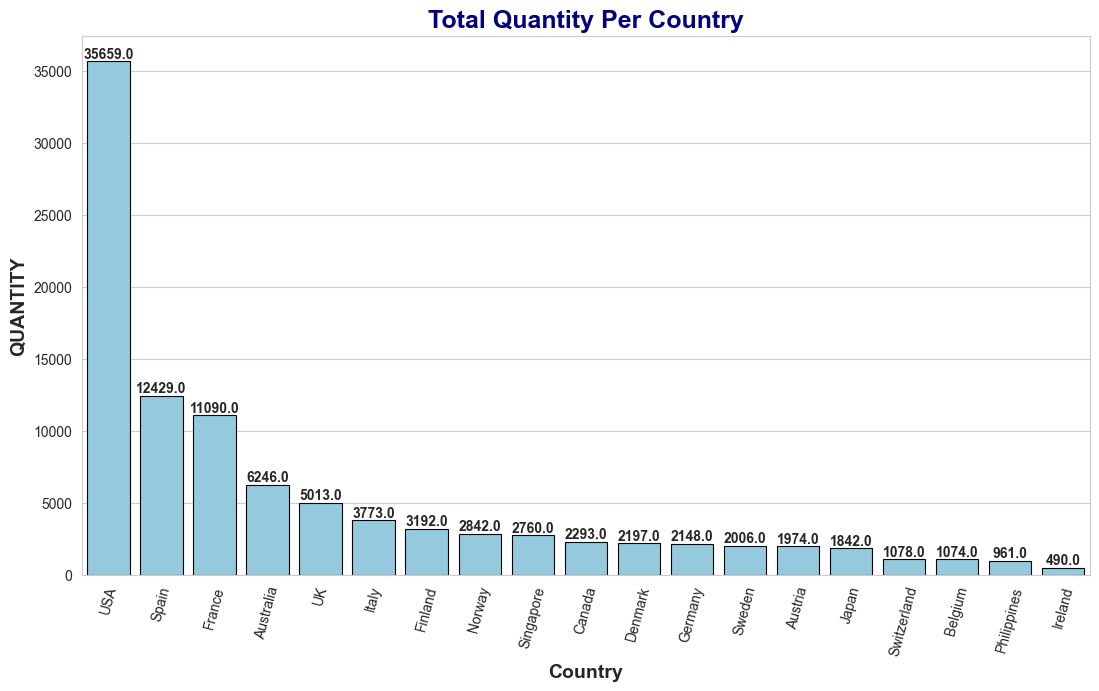

In [42]:
quantity_per_country=data.groupby('COUNTRY')['QUANTITYORDERED'].sum().sort_values(ascending=False)



plt.figure(figsize=(13,7))

plt.title("Total Quantity Per Country", fontsize=18, fontweight='bold', color='navy')
plt.xlabel("Country", fontsize=14, fontweight='bold')
plt.ylabel('QUANTITY', fontsize=14, fontweight='bold')
ax = sns.barplot(x=quantity_per_country.index,y=quantity_per_country.values,width=.8,linewidth=.8,color='skyblue',edgecolor='black')
plt.xticks(rotation=75)
bars(ax)
plt.show()

In [24]:
sales_per_country=data.groupby('COUNTRY')['SALES'].sum().sort_values(ascending=False)


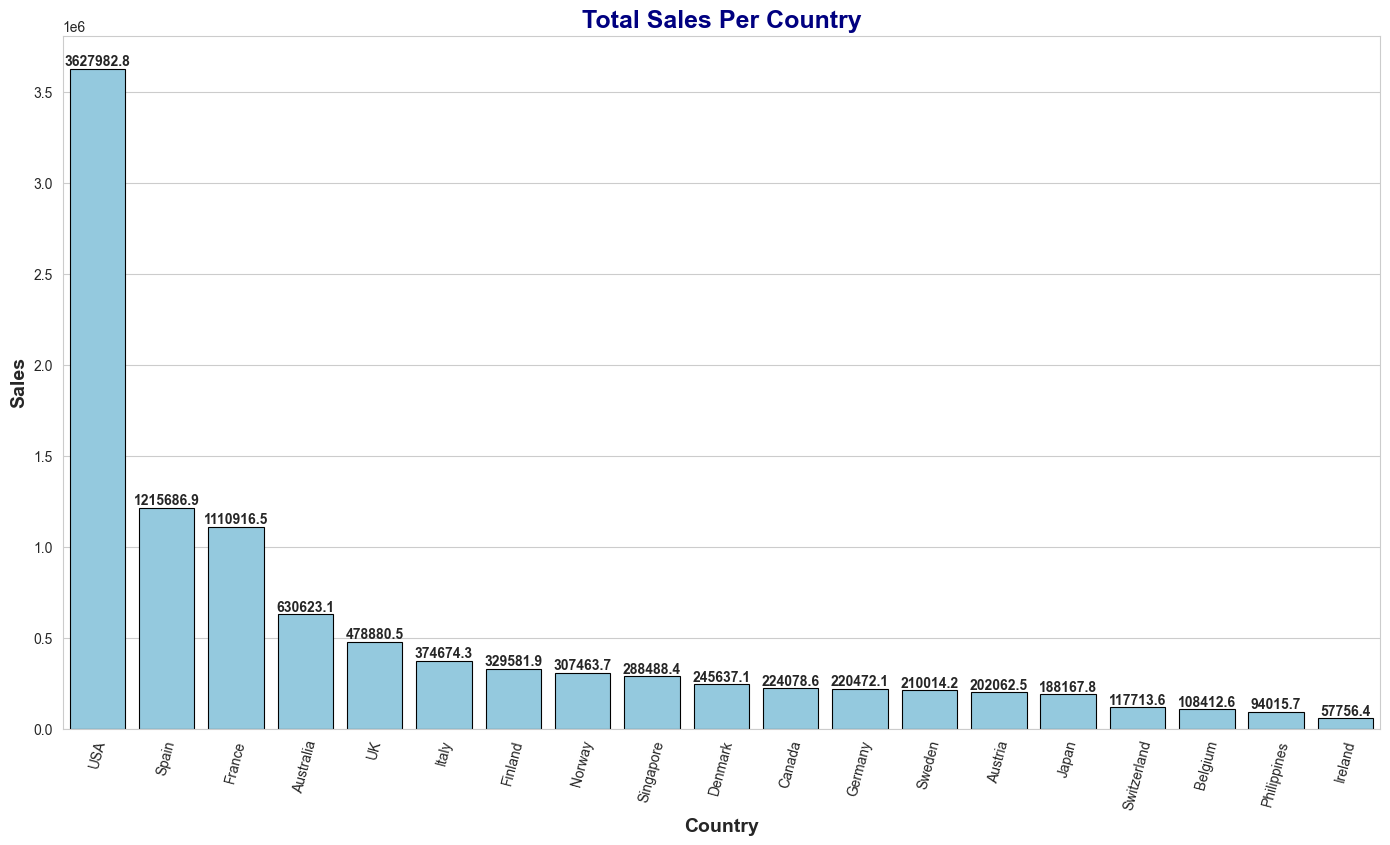

In [41]:
plt.figure(figsize=(17,9))

plt.title("Total Sales Per Country", fontsize=18, fontweight='bold', color='navy')
plt.xlabel("Country", fontsize=14, fontweight='bold')
plt.ylabel('Sales', fontsize=14, fontweight='bold')
ax = sns.barplot(x=sales_per_country.index,y=sales_per_country.values,width=.8,linewidth=.8,color='skyblue',edgecolor='black')
plt.xticks(rotation=75)
bars(ax)
plt.show()

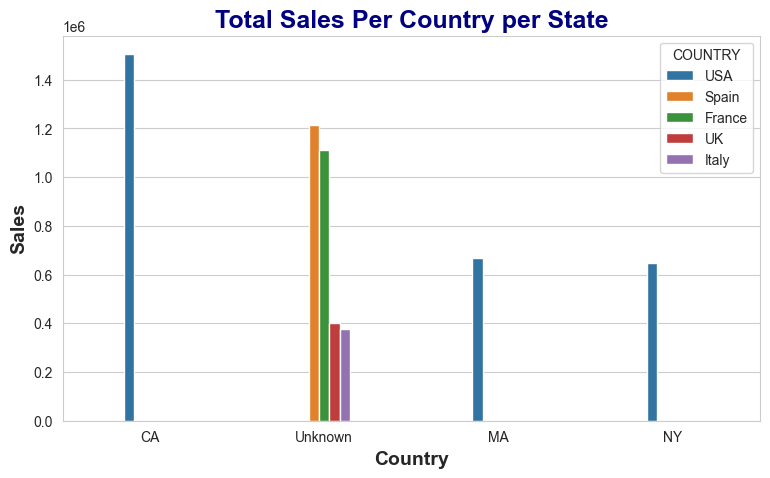

In [26]:
data_slaes_country_status = data.groupby(['COUNTRY', 'STATE'])['SALES'].sum().reset_index().sort_values(by='SALES',ascending=False).head(7)

plt.figure(figsize=(9,5))

plt.title("Total Sales Per Country per State", fontsize=18, fontweight='bold', color='navy')
plt.xlabel("Country", fontsize=14, fontweight='bold')
plt.ylabel('Sales', fontsize=14, fontweight='bold')

sns.barplot(data=data_slaes_country_status,x='STATE',y='SALES',hue='COUNTRY',width=.3)
plt.show()

In [27]:
data['DEALSIZE'].value_counts()

DEALSIZE
Medium    1384
Small     1282
Large      157
Name: count, dtype: int64

In [28]:
quantity_sizes = data.groupby('DEALSIZE')['QUANTITYORDERED'].sum().reset_index().sort_values(by='QUANTITYORDERED',ascending=False)

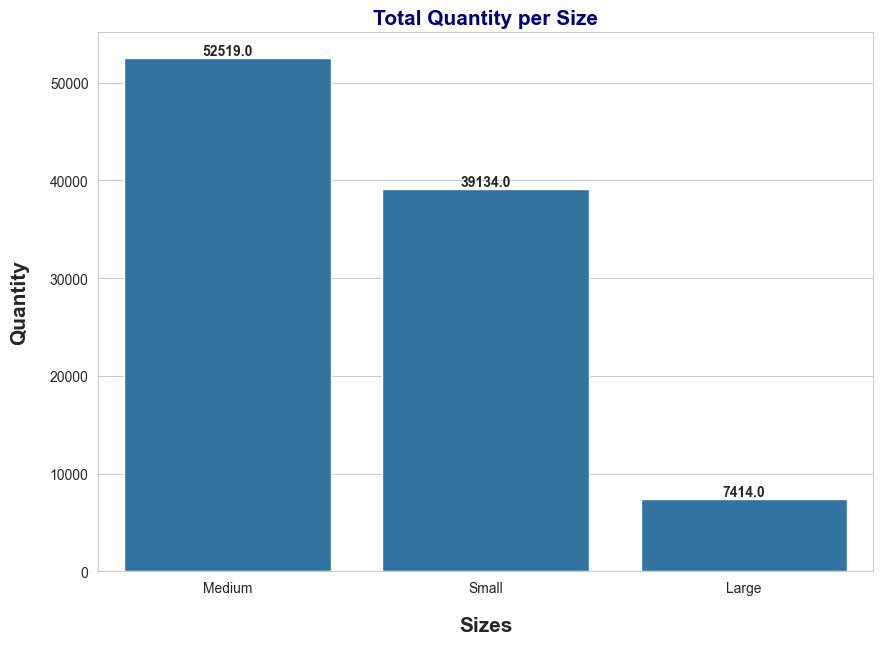

In [47]:
plt.figure(figsize=(10,7))

ax=sns.barplot(data=quantity_sizes,x='DEALSIZE',y='QUANTITYORDERED')
plt.title("Total Quantity per Size",c="navy",fontweight='bold',fontsize='15')
plt.xlabel('Sizes',labelpad=15,fontweight='bold',fontsize=15)
plt.ylabel('Quantity',labelpad=15,fontweight='bold',fontsize=15)
bars(ax)
plt.show()

In [30]:
sales_sizes = data.groupby('DEALSIZE')['SALES'].sum().reset_index().sort_values(by='SALES',ascending=False)

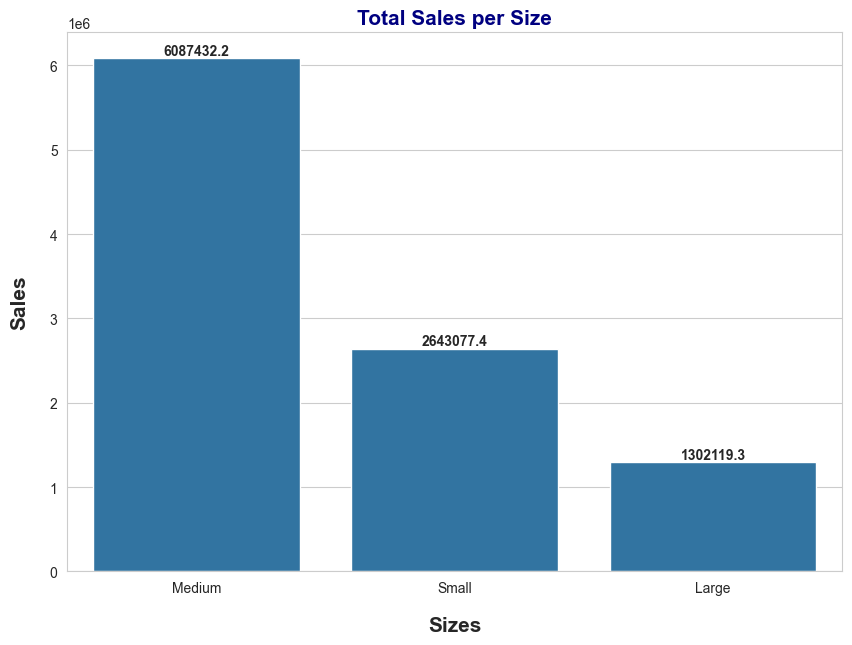

In [49]:
plt.figure(figsize=(10,7))

ax=sns.barplot(data=sales_sizes,x='DEALSIZE',y='SALES')
plt.xlabel('Sizes',labelpad=15,fontweight='bold',fontsize=15)
plt.ylabel('Sales',labelpad=15,fontweight='bold',fontsize=15)
plt.title("Total Sales per Size",c="navy",fontweight='bold',fontsize='15')
bars(ax)
plt.show()


In [51]:
data['Disscount'] = ((data['MSRP'] - data['PRICEEACH']) / data['MSRP']) * 100
data['Disscount'] = data['Disscount'].apply(lambda x : x if x > 0 else 0 )
data['Disscount%'] = data['Disscount'].apply(lambda x : f'{x:.1f}%' )



In [52]:
data['Disscount'] = ((data['MSRP'] - data['PRICEEACH']) / data['MSRP']) * 100

In [53]:
data['Disscount'] = data['Disscount'].apply(lambda x : x if x > 0 else 0)

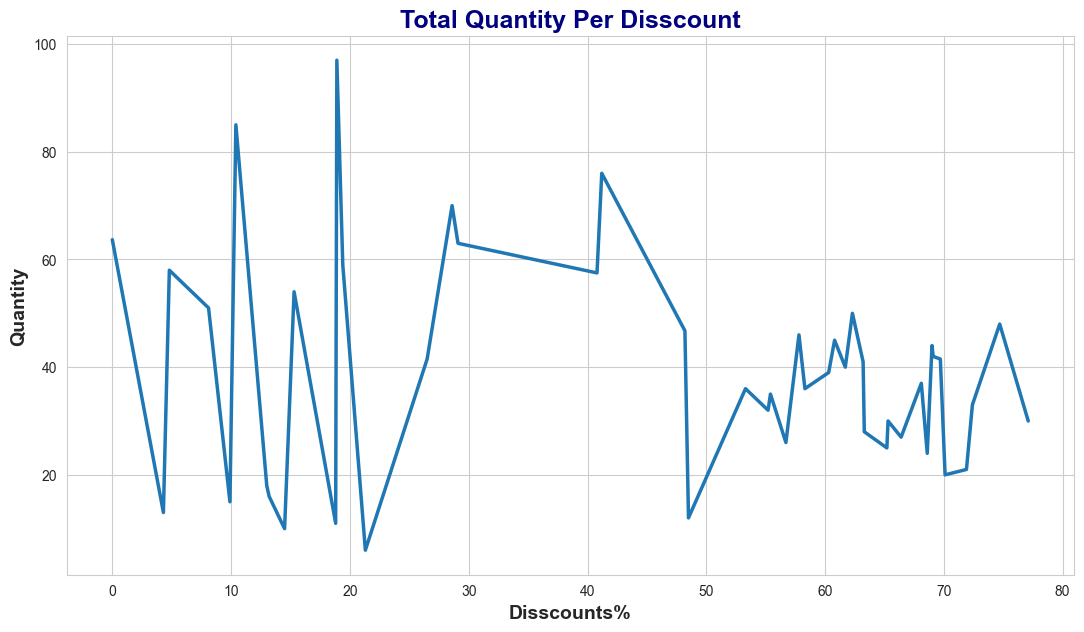

In [59]:
plt.figure(figsize=(13,7))
plt.title("Total Quantity Per Disscount", fontsize=18, fontweight='bold', color='navy')
plt.xlabel("Disscounts%", fontsize=14, fontweight='bold')
plt.ylabel('Quantity', fontsize=14, fontweight='bold')
quantity_per_disscount = round(data.groupby('QUANTITYORDERED')['Disscount'].max().reset_index(),1)
sns.lineplot(data=quantity_per_disscount,x='Disscount',y='QUANTITYORDERED',ci=None,linewidth=2.5)
plt.show()

In [62]:
data.to_excel('sales quantities analysis.xlsx',index=False)

# Now, after all this analysis and work, we can put the final analysis Data.
## 1- The year 2004 recorded the highest sales revenue and the largest quantity of products sold compared to all other years.
## 2- The year 2002 recorded the lowest quantity of products sold and the lowest sales revenue across all years.
## 3- The USA recorded the highest quantity of products ordered and the highest sales revenue among all countries.
## 4- The USA recorded the lowest quantity of products ordered and the lowest sales revenue among all countries.
## 5- the Medium size recorded the highest sales revenue and the largest quantity of products sold compared to all other years.
## 6- the Large size recorded the lowest sales revenue and the lowest quantity of products sold compared to all other years.
## 7- A 20% disscount generated the highest quantity of products ordered, indicating that discount.